## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Roy Dadon 5714
# student 2: Sahar Aviad 5843
# student 3: Gil Yona 8017
# student 4: David Saadia 3401
# (optional) student 5:
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [2]:
# Embarked - Location entry to ship - we can assume theres no order
# Pclass - First class/ business class etc.
# SibSp - Number of siblings / partners
# Parch - Number of parents or kids
# Fare - Ticket cost

In [3]:
#IMPORTS -----------
# -Necessities- 
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline

#  -- Grading Models --
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# -- Models --
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import MultinomialNB as NaiveBayes
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import GradientBoostingClassifier as GradientBoost
from sklearn.neural_network import MLPClassifier as NeuralNetwork

# -- Cross Validation and Preprocessing --
from sklearn.model_selection import StratifiedKFold as cross_val, GridSearchCV, KFold
from sklearn.feature_selection import SelectKBest as select_k_best, VarianceThreshold #, r_regression as pearson

# -- Scalers --
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# -- Visualzation --
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Loading dataset
titanic_train = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv("titanic_test.csv")
label = "Survived"

In [5]:
titanic_train.shape

(712, 8)

In [6]:
titanic_test.shape

(179, 8)

In [7]:
titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [8]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [9]:
titanic_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


## EDA: Detecting duplications, empty fields etc.
using duplicated, info

In [10]:
print("The amount of duplicates in the train set before cleaning:", titanic_train.duplicated().sum())
print("The amount of duplicates in the test set before cleaning:", titanic_test.duplicated().sum())

The amount of duplicates in the train set before cleaning: 80
The amount of duplicates in the test set before cleaning: 12


There are 80 duplicates in the train dataset, and 12 in the test set, therefore we remove them.

In [11]:
#titanic_train.drop_duplicates(inplace = True)
#print("The amount of duplicates in the train set after cleaning:",titanic_train.duplicated().sum())
#titanic_test.drop_duplicates(inplace = True)
#print("The amount of duplicates in the test set after cleaning:", titanic_test.duplicated().sum())

## Empty fields

##### Train set:

In [12]:
print(titanic_train.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


##### Test set:

In [13]:
print(titanic_test.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


There are no empty fields in the datasets.

## Correlations and Visualisation
Checking all correlations with the target label "Survived". We will visualize the top 2 most correlated features 

In [14]:
X = titanic_train.copy().drop(labels = label, axis = 1)
y = titanic_train.copy()[label]

correlation = X.corrwith(y, axis = 0)
correlation = correlation.sort_values(ascending = False, key = lambda x: np.abs(x)).head(2)

correlation_pd = pd.DataFrame(correlation).T
correlation_pd.index = [label]
correlation_pd

,Sex,Pclass
Survived,-0.550699,-0.324024


The features "Sex" and "Pclass" are the top 2 most correlated features with "Survived", therefore visualizing them will help us get info

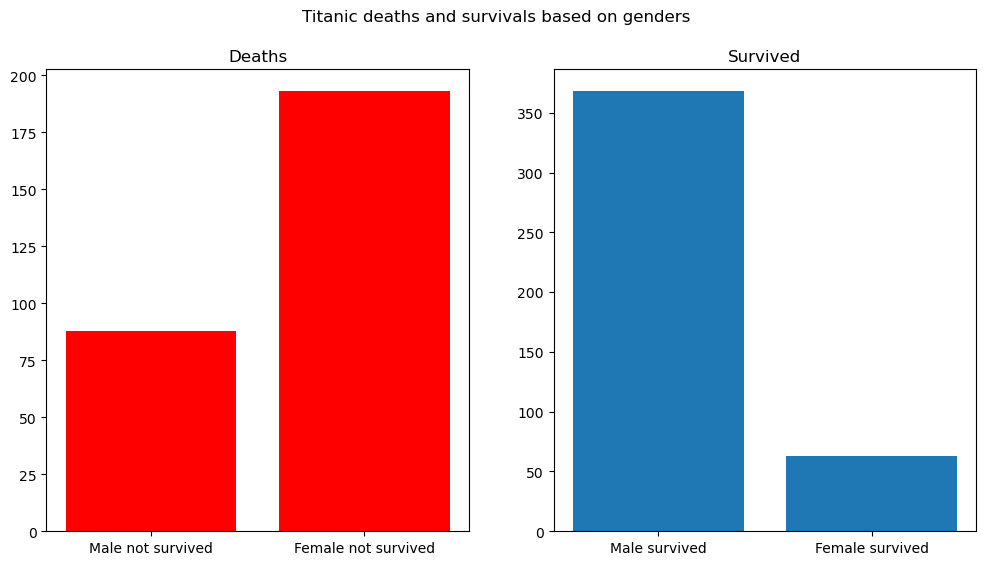

In [15]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
df_count = pd.DataFrame(titanic_train.value_counts(subset = ["Sex", label]))
count_list = list(df_count["count"])
count_list[0] , count_list[2] = count_list[2] , count_list[0]
x_labels = ["Male not survived", "Female not survived", "Male survived", "Female survived"]
ax[0].bar(x_labels[:2], count_list[:2], color = "red")
ax[0].set_title('Deaths')
ax[1].bar(x_labels[2:], count_list[2:])
fig.suptitle('Titanic deaths and survivals based on genders')
ax[1].set_title('Survived')
plt.show()

We will also show a kernal density plot

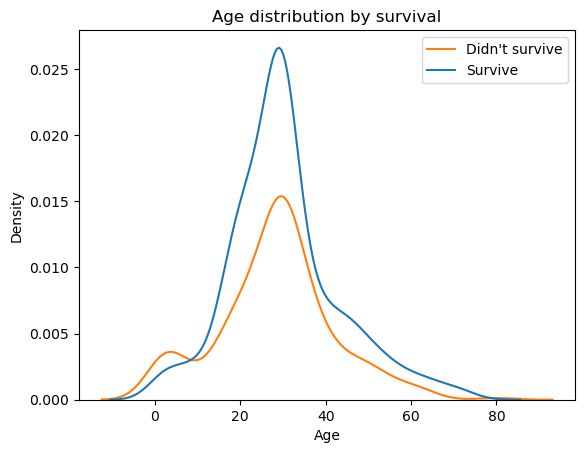

In [16]:
df2 = titanic_train[[label, "Age"]]

k = sns.kdeplot(data = df2, x = "Age", hue = "Survived", common_norm = True)
k.legend(labels = ["Didn't survive", "Survive"])
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age distribution by survival")
plt.show()


We will show a heatmap of the correlation of each class.

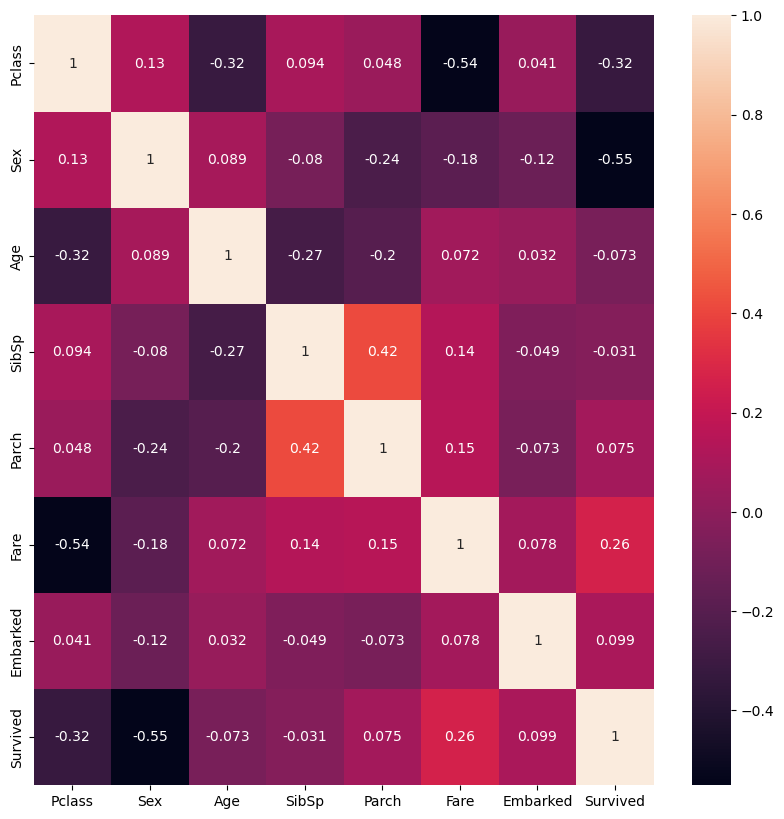

In [17]:
plt.figure(figsize = (10,10))
sns.heatmap(titanic_train.corr(), annot = True)
plt.show()

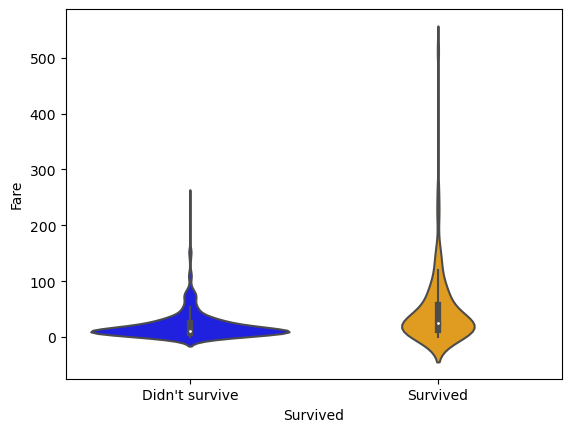

In [18]:
Violin= sns.violinplot(x="Survived", y="Fare", data=titanic_train, palette = ["blue", "orange"] )
xlabels = ["Didn't survive", "Survived"]
Violin.set(xticklabels=xlabels)
plt.show()

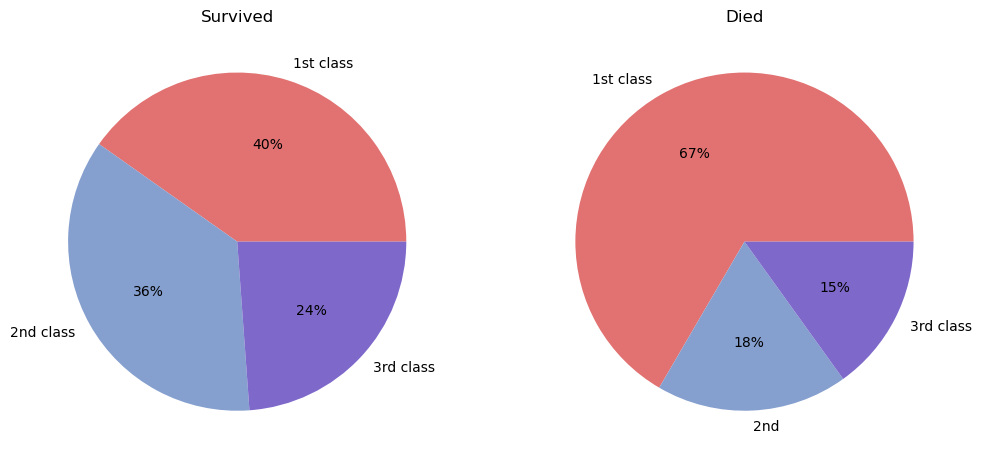

In [19]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
pallete_color= ["#e27171", "#859fcf", "#7e69cb"]	
surved = titanic_train[titanic_train[label] == 1]
notSurved = titanic_train[titanic_train[label] == 0]
ax[0].pie(surved["Pclass"].value_counts(), labels = ["1st class", "2nd class", "3rd class"], colors = pallete_color, autopct='%.0f%%') #autopct is anotate
ax[1].pie(notSurved["Pclass"].value_counts(), labels = ["1st class", "2nd", "3rd class"], colors = pallete_color, autopct='%.0f%%') #autopct is anotate
ax[0].set_title("Survived")
ax[1].set_title("Died")
plt.show()

## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [20]:
#Specifing models, scalers and feature selection determinators we want to use
models = [KNN(), NaiveBayes(), DecisionTree(), GradientBoost(),NeuralNetwork(max_iter = 2000)]
#Feature_selection = [VarianceThreshold(), select_k_best(k='all')] <---- REMOVE ME WHEN DONE
scalers = [StandardScaler(), MinMaxScaler()]

#Specifing which data we send to each parameter
#Correlation:
highest_corr= list(range( 2, 5+1 )) + ["all"] 
thresholds= [0.001,0.01, 0.1]

#KNN parameters:
KNN_k = list(range( 1 ,7+1))
KNN_weight= ["uniform", "distance"]
KNN_metric = ["manhattan", "euclidean","minkowski"]

#Naive Bayes parameters:
NB_alpha =  [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
NB_boolean = [True,False]

#Decision Tree parameters:
DT_criterion = ["gini", "entropy"]

#Neural Network parameters:
NN_hiddenLayerSizes = [(15,5),(3,5),(5,5,5),(5,3,5,3)]
NN_activation = ["tanh", "relu"]



#Greadient Boost parameters:
GB_nEstimators = [5,150,400]
GB_learnRate = [0.09, 0.01, 0.2]
GB_maxDepth = [3,5,7]
GB_loss = ["log_loss", "exponential"]


In [21]:

#Generating pipeline tuple lists
modelPipelines = [("model",b) for b in models]
Feature_selectionPipelines = [("featureSelection",select_k_best()),("varianceThreshold",VarianceThreshold())] 
scalerPipelines = [("scaler",b) for b in scalers]

#Generating all possible permutations, including ones where we use both preprocessing methods and ones where we use one or the other.
pipelines=[[("varianceThreshold", VarianceThreshold()),("featureSelection", select_k_best()),scaler,model] for model in modelPipelines for scaler in scalerPipelines]
pipelines = pipelines + [[feat, scaler, model] for model in modelPipelines for scaler in scalerPipelines for feat in Feature_selectionPipelines]


In [23]:
BestScoreOverall = 0
BestModelOverall = None
counter = 0
PermutationScoreTable = {}

#Empty params dictionary - will be filled depending on which model is being used.
params = {}


for item in pipelines:
    
    #print("The current permutation is:", item)
    permutationRow = {}
    counter = counter + 1 

    #Checking which model is being used
    match item[3][1] if len(item) > 3 else item[2][1]:

        case KNN():
            params = {
                "model__n_neighbors": KNN_k, 
                "model__weights": KNN_weight,
                "model__metric": KNN_metric
                }
            permutationRow["Model"] = "KNN"
        
        case NaiveBayes():
            params = {
                "model__alpha": NB_alpha,
                "model__force_alpha": NB_boolean,
                "model__fit_prior": NB_boolean
                }
            if len(item) > 3: 
                item[2] = scalerPipelines[1] 
            else: item[1] = scalerPipelines[1]

            permutationRow["Model"] = "Naive Bayes"
    
        case DecisionTree():
            params = {
                "model__criterion": DT_criterion,
                "model__max_depth": list(range(1, 15)),
                "model__min_samples_leaf": list(range(1, 15))
                }
            permutationRow["Model"] = "Decision Tree"
    
        case NeuralNetwork():
            params = {
                "model__hidden_layer_sizes": NN_hiddenLayerSizes,
                "model__activation": NN_activation
            }
            permutationRow["Model"] = "Neural Network"


        case GradientBoost():
            params = {
                "model__n_estimators": GB_nEstimators,
                "model__learning_rate": GB_learnRate,
                "model__max_depth": GB_maxDepth,
                "model__loss": GB_loss   
            }
            permutationRow["Model"] = "Gradient Boost"

    if len(item)>3 :
        params["varianceThreshold__threshold"] = thresholds
        params["featureSelection__k"] = highest_corr
    
    elif item[0][0] == "featureSelection":
        params["featureSelection__k"] = highest_corr
    
    else: params["varianceThreshold__threshold"] = thresholds
    


    KCrossValidation = KFold(n_splits=5, shuffle=True, random_state=42)
    piper = Pipeline(item)
    gridsearch = GridSearchCV(piper, params, cv = KCrossValidation, scoring= 'f1')
    gridsearch.fit(titanic_train.drop(label, axis = 1), titanic_train[label])

    
    bestParams = gridsearch.best_params_
    bestModel = gridsearch.best_estimator_

    permutationRow["Variance Threshold"] = bestParams.get("varianceThreshold__threshold", "-")
    permutationRow["Feature Selection"] = bestParams.get("featureSelection__k", "-")
    permutationRow["Scaler"] = item[2][1].__class__.__name__
    permutationRow["KNN n_neighbors"] = bestParams.get("model__n_neighbors", "-")
    permutationRow["KNN weights"] = bestParams.get("model__weights", "-")
    permutationRow["KNN metric"] = bestParams.get("model__metric", "-")
    permutationRow["NB alpha"] = bestParams.get("model__alpha", "-")
    permutationRow["NB force_alpha"] = bestParams.get("model__force_alpha", "-")
    permutationRow["NB fit_prior"] = bestParams.get("model__fit_prior", "-")
    permutationRow["DT criterion"] = bestParams.get("model__criterion", "-")
    permutationRow["DT max_depth"] = bestParams.get("model__max_depth", "-")
    permutationRow["DT min_samples_leaf"] = bestParams.get("model__min_samples_leaf", "-")
    permutationRow["NN hidden_layer_sizes"] = bestParams.get("model__hidden_layer_sizes", "-")
    permutationRow["NN activation"] = bestParams.get("model__activation", "-")
    permutationRow["NN alpha"] = bestParams.get("model__alpha", "-")
    permutationRow["NN learning_rate_init"] = bestParams.get("model__learning_rate_init", "-")
    permutationRow["GB n_estimators"] = bestParams.get("model__n_estimators", "-")
    permutationRow["GB learning_rate"] = bestParams.get("model__learning_rate", "-")
    permutationRow["GB max_depth"] = bestParams.get("model__max_depth", "-")
    permutationRow["GB loss"] = bestParams.get("model__loss", "-")


    permutationRow["Score"] = gridsearch.best_score_

    t = str(counter)
    PermutationScoreTable[ "Permutation " + t] = permutationRow

    #print("--------------------------------------", end="\n")	

    if gridsearch.best_score_ > BestScoreOverall:
        BestScoreOverall = gridsearch.best_score_
        BestModelOverall = bestModel


print("Best model is: ", BestModelOverall, "\nWith score: ", BestScoreOverall)

Best model is:  Pipeline(steps=[('varianceThreshold', VarianceThreshold(threshold=0.01)),
                ('featureSelection', SelectKBest(k='all')),
                ('scaler', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            loss='exponential', max_depth=5,
                                            n_estimators=400))]) 
With score:  0.7788253402446201


## Permutations score table
#### Description of each permutation, the best parameters for said permutation, and it's score

In [25]:
df = pd.DataFrame(PermutationScoreTable)
df = df.T
df.sort_values(by = ["Score"], inplace = True, ascending = False)
df

,Model,Variance Threshold,Feature Selection,Scaler,KNN n_neighbors,KNN weights,KNN metric,NB alpha,NB force_alpha,NB fit_prior,...,DT min_samples_leaf,NN hidden_layer_sizes,NN activation,NN alpha,NN learning_rate_init,GB n_estimators,GB learning_rate,GB max_depth,GB loss,Score
Permutation 7,Gradient Boost,0.01,all,StandardScaler,-,-,-,-,-,-,...,-,-,-,-,-,400,0.01,5,exponential,0.778825
Permutation 8,Gradient Boost,0.001,all,MinMaxScaler,-,-,-,-,-,-,...,-,-,-,-,-,400,0.01,5,exponential,0.776549
Permutation 24,Gradient Boost,0.001,-,GradientBoostingClassifier,-,-,-,-,-,-,...,-,-,-,-,-,400,0.01,5,exponential,0.776389
Permutation 23,Gradient Boost,-,all,GradientBoostingClassifier,-,-,-,-,-,-,...,-,-,-,-,-,400,0.01,5,exponential,0.776389
Permutation 25,Gradient Boost,-,all,GradientBoostingClassifier,-,-,-,-,-,-,...,-,-,-,-,-,400,0.01,5,exponential,0.774196
Permutation 26,Gradient Boost,0.1,-,GradientBoostingClassifier,-,-,-,-,-,-,...,-,-,-,-,-,400,0.01,5,exponential,0.774112
Permutation 5,Decision Tree,0.001,4,StandardScaler,-,-,-,-,-,-,...,5,-,-,-,-,-,-,7,-,0.756432
Permutation 6,Decision Tree,0.01,4,MinMaxScaler,-,-,-,-,-,-,...,5,-,-,-,-,-,-,7,-,0.756432
Permutation 21,Decision Tree,-,4,DecisionTreeClassifier,-,-,-,-,-,-,...,5,-,-,-,-,-,-,7,-,0.756432
Permutation 19,Decision Tree,-,4,DecisionTreeClassifier,-,-,-,-,-,-,...,5,-,-,-,-,-,-,7,-,0.756432


## The best classification model is - Gradient Boosting
#### With the following paremeters

In [26]:
BestModelOverall

Pipeline(steps=[('varianceThreshold', VarianceThreshold(threshold=0.01)),
                ('featureSelection', SelectKBest(k='all')),
                ('scaler', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            loss='exponential', max_depth=5,
                                            n_estimators=400))])

## Part 4 - Apply on test and show model performance estimation

### Applying the best model on the original training set

In [45]:
BestModelOverall.fit(titanic_train.drop(label, axis = 1), titanic_train[label])
y_predict = BestModelOverall.predict(titanic_test.drop(label, axis = 1))



## Model Evaluation
### F1 score and confusion matrix

In [46]:
cm = confusion_matrix(titanic_test[label], y_predict)
best_f1 = f1_score(titanic_test[label], y_predict)

cm_df = pd.DataFrame(cm)
cm_df.index = cm_df.columns = ["True", "False"]
print("The selected model achieved a score of: ", best_f1)
cm_df

The selected model achieved a score of:  0.7927927927927928


,True,False
True,112,6
False,17,44


### Classification report

In [47]:
report = classification_report(titanic_test[label], y_predict,output_dict=True)
df_report=pd.DataFrame(report)
df_report.transpose()

,precision,recall,f1-score,support
0,0.868217,0.949153,0.906883,118.000000
1,0.880000,0.721311,0.792793,61.000000
accuracy,0.871508,0.871508,0.871508,0.871508
macro avg,0.874109,0.835232,0.849838,179.000000
weighted avg,0.872232,0.871508,0.868003,179.000000


### Original data side by side with model prediction

In [49]:
pred_df = titanic_test.copy()
pred_df["Model Prediction"] = y_predict
pred_df.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Model Prediction
0,3,1,35.000000,0,0,7.0500,0,0,0
1,3,1,30.000000,0,0,7.2500,0,0,0
2,3,1,29.699118,0,0,14.5000,0,0,0
3,3,0,21.000000,0,0,7.7500,2,0,1
4,3,1,32.000000,0,0,56.4958,0,1,1
5,1,1,17.000000,0,2,110.8833,1,1,0
6,3,0,21.000000,1,0,9.8250,0,0,0
7,3,1,9.000000,5,2,46.9000,0,0,0
8,1,0,52.000000,1,0,78.2667,1,1,1
9,3,1,29.699118,8,2,69.5500,0,0,0
